<a href="https://colab.research.google.com/github/jinyoungkim0214/portfolio/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Change directory to where this file is located
"""
%cd /content/drive/MyDrive/Homework 1-1

/content/drive/MyDrive/Homework 1-1


## Import Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mnist.data_utils import load_data

## K-Nearest Neighbor Implementation

In [ ]:
class KNN:
    """ k-nearest neighbor classifier class """
    def train(self, X, y):
        """
        Trains the classifier using the given training data (X, y).

        Question (a)
        - Recall that for k-nearest neighbors this is just memorizing the training data.

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """
        self.X_train = X
        self.y_train = y

    def inference(self, X_test, k=1, dist_metric='l2'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels.

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred

    def compute_distance(self, X_test, dist_metric):
        """
        Computes the distance between the training data and test data using the given dist_metric.

        Question (b)
        - comlete the if and elif statements.
        - hint: you can use np.linalg.norm to normalize data for cosine similarity.
        - hint: you can use np.repeat and np.tile to vectorize L2 distance computation.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.
        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of traininig data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        """
        if dist_metric=='dot':
          # your code here
          dists = np.dot(X_test, self.X_train.T)

        elif dist_metric=='cos':
          # your code here
          X_test_norm = np.linalg.norm(X_test, axis=1, keepdims=True)
          X_train_norm = np.linalg.norm(self.X_train, axis=1, keepdims=True)
          dists = np.dot(X_test, self.X_train.T) / (X_test_norm*X_train_norm.T)

        elif dist_metric=='l2':
          # your code here
          X_test_squared = np.sum(np.square(X_test), axis=1, keepdims=True)
          X_train_squared = np.sum(np.square(self.X_train), axis=1, keepdims=True)
          cross_term = -2 * np.dot(X_test, self.X_train.T)
          X_test_squared_exp = np.repeat(X_test_squared, self.X_train.shape[0], axis=1)
          X_train_squared_exp = np.tile(X_train_squared.T, (X_test.shape[0], 1))
          dists = np.sqrt(X_test_squared_exp + cross_term + X_train_squared_exp)

        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Question (c)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of traininig data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test, dtype=int)
        for i in range(num_test):
            closest_y = []
            sorted_indices = np.argsort(dists[i])
            closest_y = self.y_train[sorted_indices[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y.ravel()))
        return y_pred

    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.

        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading

In [ ]:
def sample_data(X, y, count):
    mask = np.random.choice(X.shape[0], count, replace=False)
    X_sampled = X[mask]
    y_sampled = y[mask]
    return X_sampled, y_sampled

In [ ]:
num_train_data = 1000
num_test_data = 200

X_train_src, y_train_src, X_test_src, y_test_src = load_data(one_hot_encoding=False) # Training data is flattened when it is loaded
X_train, y_train = sample_data(X_train_src, y_train_src, num_train_data)
X_test, y_test = sample_data(X_test_src, y_test_src, num_test_data)

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


## Model Training & Evaluation

In [ ]:
model = KNN()
model.train(X_train, y_train)

In [ ]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.86


## Experiments

In [ ]:
# Modify the number of k's and metrics to try as you want
num_ks = 50
metrics = ['dot', 'cos', 'l2']

In [ ]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50



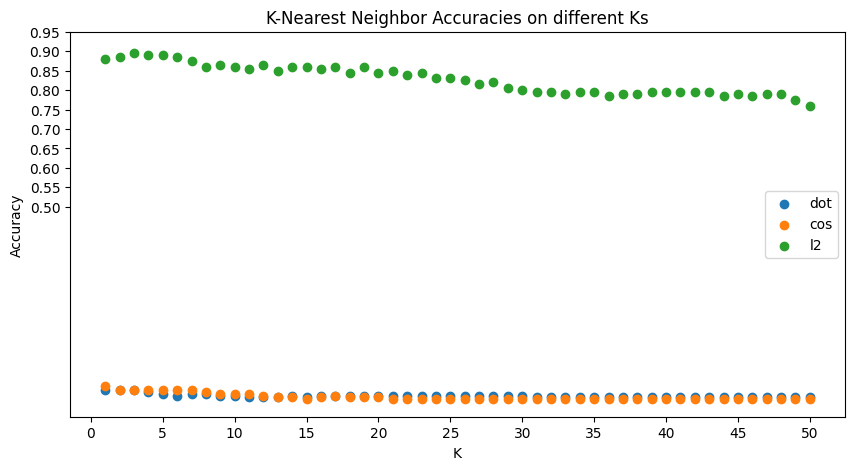

In [ ]:
# Visualize the result
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [ ]:
###
# Question (d)
# Briefly report what you observe in the plot above.
'''
위 그래프는 k값에 따른 KNN 분류기의 정확도를 나타낸 것이다. 이 그래프를 통해 여러 특징을 관찰할 수 있었다.
먼저, k가 증가함에 따라 Accuracy가 감소하는 것을 확인할 수 있다.
또한, 서로 다른 거리 측정 방식('l2', 'dot', 'cos')을 사용하였을 때 분류기의 성능에 편차가 존재하는 것을 확인하였다.
dot이나 cos 방식을 적용하였을 때보다 l2 distance를 사용하였을 때 분류기의 성능이 월등히 높은 것을 확인하였다.
이러한 결과를 통해, KNN 분류기의 성능을 높이고자 할 때 결과를 시각화하면 최적의 K값과 거리 측정방식을 선택할 때
도움이 된다는 것을 확인하였다.
'''
###

  Write your answer to (d) in this cell.

In [ ]:
###
# Question (e)
# In what kind of dataset dot product(not cosine similarity) will serve as a good metric?
'''
데이터 특성을 고려하여 매트틱을 선정해야 하는데, dot product의 경우 벡터의 정렬과 관련된 특성이 중요한 데이터에 적합하다.
예를 들면, 먼저 자연어처리 분야에서 사용되는 텍스트 데이터의 경우 dot product를 통해 문서 간 유사도를 측정할 수 있다.
비슷한 용어 사용 분포를 가진 문서는 더 높은 dot product 결과를 가질 것이다.
또한, binary 데이터의 경우 dot product를 통해 데이터 포인트간 유사도를 측정할 수 있다. 여기서 binary 데이터란
어떠한 특징의 유무, 예 아니오 등 2가지로 구분될 수 있는 데이터를 의미한다. 이러한 경우에 dot product로 일치하는 특징 수를 카운팅하면
데이터 포인트 간 유사도를 측정할 수 있을 것이다
'''
###

  Write your answer to (e) in this cell.